In [1]:
%matplotlib inline


*****************
Specifying Colors
*****************

Matplotlib recognizes the following formats to specify a color:

* an RGB or RGBA (red, green, blue, alpha) tuple of float values in ``[0, 1]``
  (e.g., ``(0.1, 0.2, 0.5)`` or ``(0.1, 0.2, 0.5, 0.3)``);
* a hex RGB or RGBA string (e.g., ``'#0f0f0f'`` or ``'#0f0f0f80'``;
  case-insensitive);
* a string representation of a float value in ``[0, 1]`` inclusive for gray
  level (e.g., ``'0.5'``);
* one of ``{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}``;
* a X11/CSS4 color name (case-insensitive);
* a name from the `xkcd color survey`_, prefixed with ``'xkcd:'`` (e.g.,
  ``'xkcd:sky blue'``; case insensitive);
* one of the Tableau Colors from the 'T10' categorical palette (the default
  color cycle): ``{'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
  'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}``
  (case-insensitive);
* a "CN" color spec, i.e. `'C'` followed by a number, which is an index into
  the default property cycle (``matplotlib.rcParams['axes.prop_cycle']``); the
  indexing is intended to occur at rendering time, and defaults to black if the
  cycle does not include color.


"Red", "Green", and "Blue" are the intensities of those colors, the combination
of which span the colorspace.

How "Alpha" behaves depends on the ``zorder`` of the Artist.  Higher
``zorder`` Artists are drawn on top of lower Artists, and "Alpha" determines
whether the lower artist is covered by the higher.
If the old RGB of a pixel is ``RGBold`` and the RGB of the
pixel of the Artist being added is ``RGBnew`` with Alpha ``alpha``,
then the RGB of the pixel is updated to:
``RGB = RGBOld * (1 - Alpha) + RGBnew * Alpha``.  Alpha
of 1 means the old color is completely covered by the new Artist, Alpha of 0
means that pixel of the Artist is transparent.

For more information on colors in matplotlib see

* the :doc:`/gallery/color/color_demo` example;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/named_colors` example.

"CN" color selection
--------------------

"CN" colors are converted to RGBA as soon as the artist is created.  For
example,


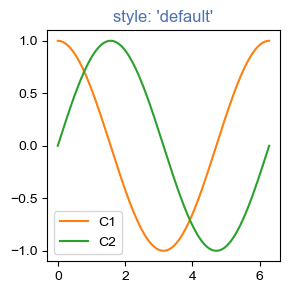

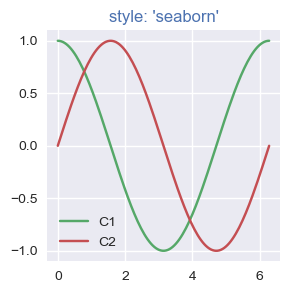

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()

demo('default')
demo('seaborn')

will use the first color for the title and then plot using the second
and third colors of each style's ``mpl.rcParams['axes.prop_cycle']``.



xkcd v X11/CSS4
---------------

The xkcd colors are derived from a user survey conducted by the
webcomic xkcd.  `Details of the survey are available on the xkcd blog
<https://blog.xkcd.com/2010/05/03/color-survey-results/>`__.

Out of 148 colors in the CSS color list, there are 95 name collisions
between the X11/CSS4 names and the xkcd names, all but 3 of which have
different hex values.  For example ``'blue'`` maps to ``'#0000FF'``
where as ``'xkcd:blue'`` maps to ``'#0343DF'``.  Due to these name
collisions all of the xkcd colors have ``'xkcd:'`` prefixed.  As noted in
the blog post, while it might be interesting to re-define the X11/CSS4 names
based on such a survey, we do not do so unilaterally.

The name collisions are shown in the table below; the color names
where the hex values agree are shown in bold.



(0.0, 3.0, 0.0, 50.0)

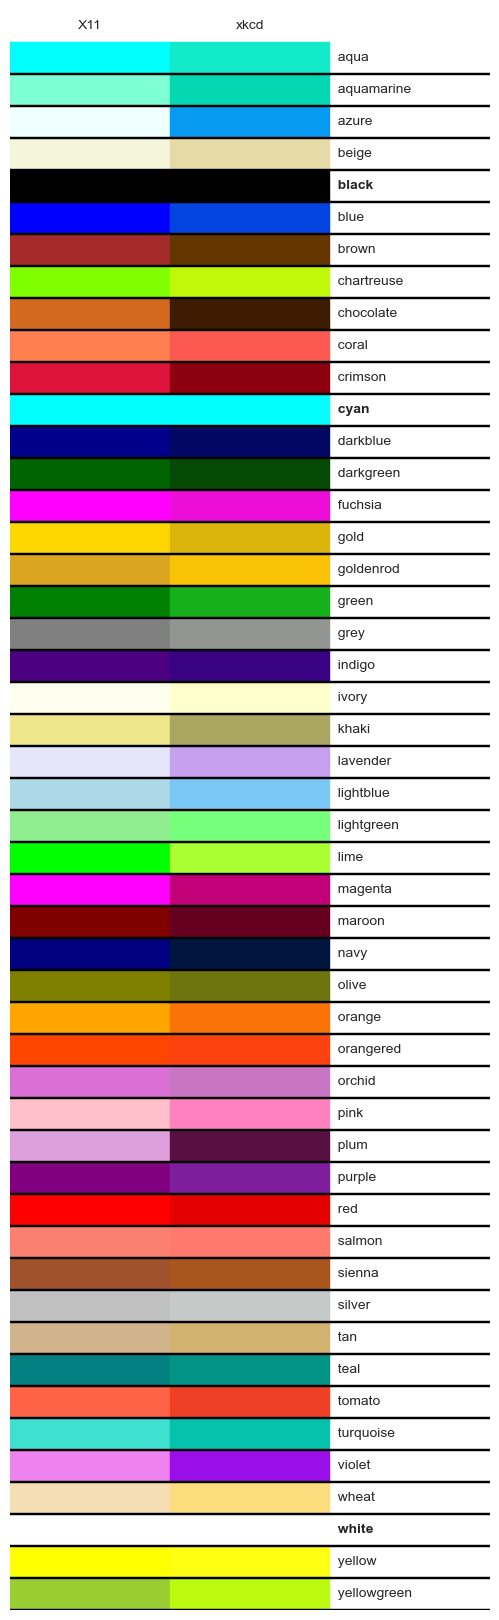

In [3]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[4.8, 16])
ax = fig.add_axes([0, 0, 1, 1])

for j, n in enumerate(sorted(overlap, reverse=True)):
    weight = None
    cn = mcd.CSS4_COLORS[n]
    xkcd = mcd.XKCD_COLORS["xkcd:" + n].upper()
    if cn == xkcd:
        weight = 'bold'

    r1 = mpatch.Rectangle((0, j), 1, 1, color=cn)
    r2 = mpatch.Rectangle((1, j), 1, 1, color=xkcd)
    txt = ax.text(2, j+.5, '  ' + n, va='center', fontsize=10,
                  weight=weight)
    ax.add_patch(r1)
    ax.add_patch(r2)
    ax.axhline(j, color='k')

ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
ax.text(1.5, j + 1.5, 'xkcd', ha='center', va='center')
ax.set_xlim(0, 3)
ax.set_ylim(0, j + 2)
ax.axis('off')